In [12]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC


import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 간단한 2D 데이터 생성
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X

array([[ 0.55942643,  2.38869353],
       [ 1.31217492, -0.7173148 ],
       [-1.5598485 , -1.92487377],
       [-2.2813861 , -0.1368559 ],
       [ 1.56070438, -0.42795824],
       [-0.80804463,  1.19664076],
       [-0.27062383, -2.25553963],
       [ 0.480502  ,  0.54914434],
       [-1.20757158, -1.26898369],
       [ 0.25415746, -1.79532002],
       [ 2.59123946,  0.24472415],
       [ 0.07123641,  0.49429823],
       [-1.17762637, -1.20592943],
       [ 0.93343952,  0.68811892],
       [ 1.65214494, -0.35885569],
       [-1.40735658, -1.56826626],
       [ 1.02255619, -1.08324727],
       [-0.81680628, -0.6795874 ],
       [ 1.50575249, -0.38919817],
       [-2.17105282, -0.04862909],
       [ 0.71479373, -1.42922002],
       [-0.15013844, -0.11708689],
       [-1.4117586 , -1.5332749 ],
       [-2.58590856, -0.40925706],
       [ 0.82600732, -1.05383855],
       [-0.07133524,  0.08896214],
       [ 0.6273745 , -1.32933233],
       [ 1.65882246, -0.43131517],
       [ 1.2798899 ,

In [38]:
# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


In [34]:
# SVM 모델 생성
model_hard = LinearSVC(C=100)
model_soft = LinearSVC(C=1)

# 모델 학습
model_hard.fit(X_train, y_train)
model_soft.fit(X_train, y_train)

LinearSVC(C=1)

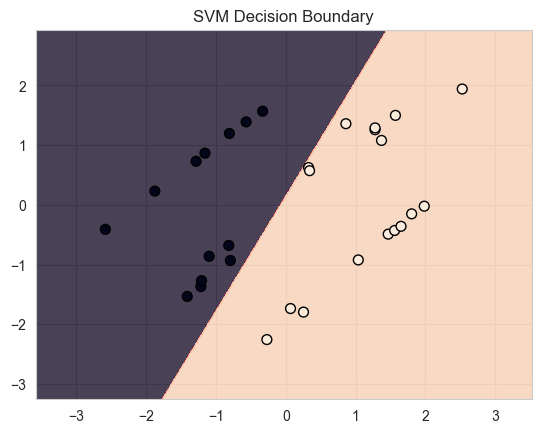

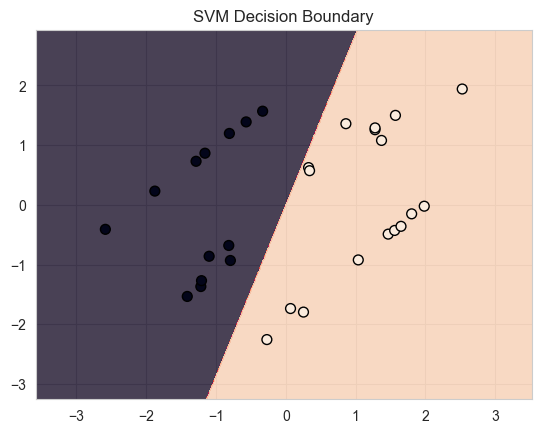

In [35]:
# 학습 데이터와 분류 경계를 시각화하는 함수
def plot_decision_boundary(X, y, model):
    # 경계 시각화를 위해 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # 모델을 사용해 각 좌표에서의 예측값을 계산
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 경계 시각화
    plt.contourf(xx, yy, Z, alpha=0.8)

    # 데이터 포인트 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Decision Boundary")
    plt.show()

# 학습된 모델과 함께 경계 시각화
plot_decision_boundary(X_test, y_test, model_hard)
plot_decision_boundary(X_test, y_test, model_soft)

In [39]:
# 예측
y_pred_hard = model_hard.predict(X_test)
y_pred_soft = model_soft.predict(X_test)

In [42]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Pred_Hard': y_pred_hard,
    'Pred_Soft': y_pred_soft
})

# 처음 10개만 출력 
print(comparison_df.head(10))

   Actual  Pred_Hard  Pred_Soft
0       1          1          1
1       1          1          1
2       0          0          0
3       1          1          1
4       1          1          1
5       1          1          1
6       0          0          0
7       1          1          1
8       0          0          0
9       0          0          0


In [40]:
from sklearn.metrics import accuracy_score

# 정확도 출력
print("Hard margin model accuracy:", accuracy_score(y_test, y_pred_hard))
print("Soft margin model accuracy:", accuracy_score(y_test, y_pred_soft))

Hard margin model accuracy: 1.0
Soft margin model accuracy: 1.0


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# 혼동 행렬
print("Hard margin confusion matrix:\n", confusion_matrix(y_test, y_pred_hard))
print("Soft margin confusion matrix:\n", confusion_matrix(y_test, y_pred_soft))

# 상세 리포트
print("Hard margin classification report:\n", classification_report(y_test, y_pred_hard))
print("Soft margin classification report:\n", classification_report(y_test, y_pred_soft))

Hard margin confusion matrix:
 [[13  0]
 [ 0 17]]
Soft margin confusion matrix:
 [[13  0]
 [ 0 17]]
Hard margin classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Soft margin classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Iris Dataset

In [30]:
# iris데이터의 2개 class(Iris-setosa, Iris-Versicolor)에 대해 고려해보자

iris = load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # Iris-setosa 와 Iris-Versicolor 에 대해 고려해보자
data.tail()

,petal length,petal width,target
95,0.251221,0.000878,1
96,0.251221,0.132510,1
97,0.308059,0.132510,1
98,-0.430828,-0.130755,1
99,0.194384,0.132510,1


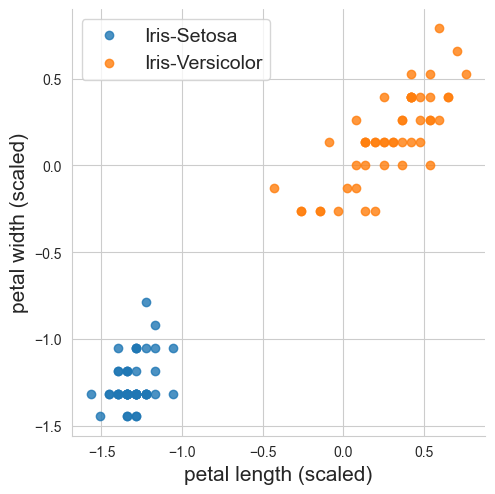

In [31]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.show()

In [43]:
# Linear Hard
svc = LinearSVC(C=100)
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

# 출력
print(f"w0 (petal length 계수): {w0:.4f}")
print(f"w1 (petal width 계수): {w1:.4f}")
print(f"bias (절편 b): {b:.4f}")

w0 (petal length 계수): 1.4832
w1 (petal width 계수): 1.1943
bias (절편 b): 1.7741


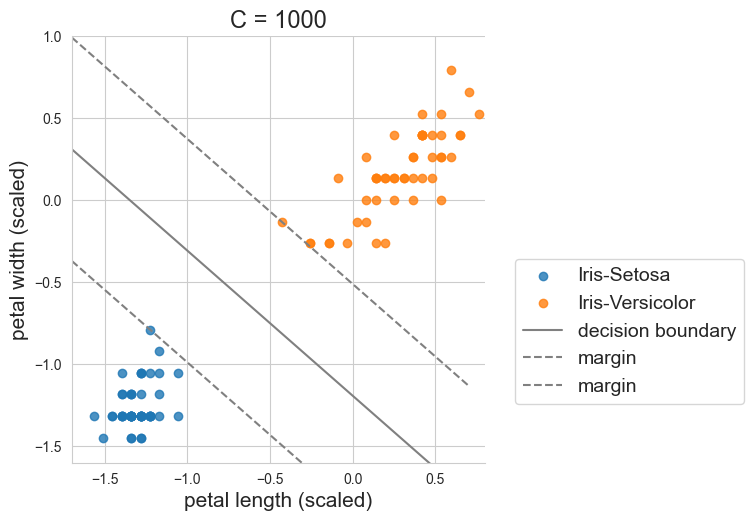

In [32]:
x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['Iris-Setosa','Iris-Versicolor','decision boundary','margin','margin'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [45]:
# Linear Soft

C=1
svc = LinearSVC(C=C)
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

# 출력
print(f"w0 (petal length 계수): {w0:.4f}")
print(f"w1 (petal width 계수): {w1:.4f}")
print(f"bias (절편 b): {b:.4f}")

w0 (petal length 계수): 1.0592
w1 (petal width 계수): 0.8236
bias (절편 b): 1.1951


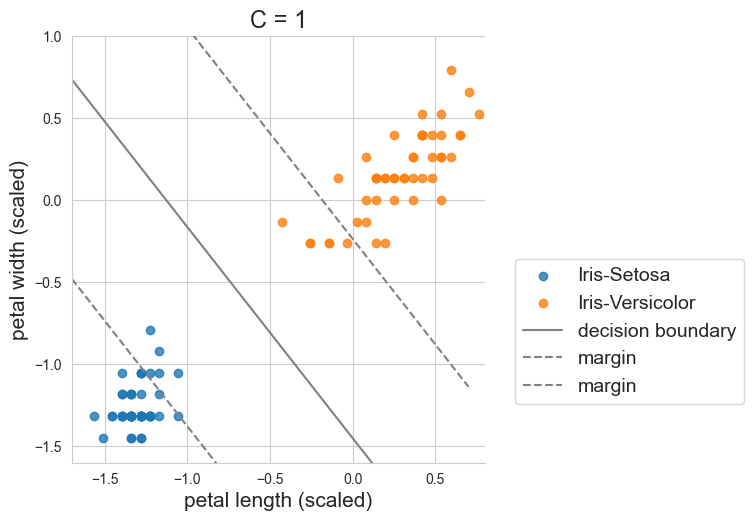

In [47]:
x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['Iris-Setosa','Iris-Versicolor','decision boundary','margin','margin'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()